# Сборный проект

# 1. Ознакомление с данными

### Описание
<br>
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. 

•	Name — название игры
<br>
•	Platform — платформа
<br>
•	Year_of_Release — год выпуска
<br>
•	Genre — жанр игры
<br>
•	NA_sales — продажи в Северной Америке (миллионы проданных копий)
<br>
•	EU_sales — продажи в Европе (миллионы проданных копий)
<br>
•	JP_sales — продажи в Японии (миллионы проданных копий)
<br>
•	Other_sales — продажи в других странах (миллионы проданных копий)
<br>
•	Critic_Score — оценка критиков (максимум 100)
<br>
•	User_Score — оценка пользователей (максимум 10)
<br>
•	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [1]:
#импортируем библиотеки

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
#df = pd.read_csv('games.csv', sep=',')
df = pd.read_csv('/datasets/games.csv', sep=',')
display(df.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
#try:
    #df = pd.read_csv('games.csv')
#except:
    #df = pd.read_csv('/datasets/games.csv')

In [4]:
#Смотрим информацию по типам данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# проверяем пропуски
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
# подсчёт явных дубликатов
df.duplicated().sum() 

0

In [7]:
#Проверим данные методом unique()
#df['Name'].unique()    
#df['Platform'].unique()
#df['Year_of_Release'].unique()
#df['Genre'].unique()   
#df['NA_sales'].unique()
#df['EU_sales'].unique()
#df['JP_sales'].unique()
#df['Other_sales'].unique()
#df['Critic_Score'].unique()
#df['User_Score'].unique()
df['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

# Вывод
<br>
Посмотрев общую информацию, я отметила для себя, что необходимо:
<br>
1)поменять типы данных Year_of_Release и Critic_score с float на int, так как это целочисленные значения
<br>
User_Score с object на float, так как там есть значения с плавающей точкой
<br>
2)Обработать пропуски (год выпуска, жанр, оценка критиков, оценка пользователей, рейтинг) 
<br>
3)Явные дубликаты не обнаружены

# 2. Подготовка данных

In [8]:
#Приводим названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Проверим 2 пропуска в столбце name и genre

In [9]:
df.loc[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
df.loc[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Данные с неизвестным названием, неизвестным жанром, а так же неизвестными рейтингами совпадают. Предлагаю убрать, так как на остальные данные они не повлияют, а также нам нужно узнать перспективные игры, а игры без названия нам не дадут никакой полезной информации

In [11]:
#Убираем данные с пропусками в столбцах name и year_of_release
df.drop(df[df['name'].isna()].index, inplace=True)
df.drop(df[df['year_of_release'].isna()].index, inplace=True)
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [12]:
#Обрабатываем пропуски в столбце user_score
df[df['user_score'] == 'tbd']['user_score'].count()

2376

In [13]:
#В столбце user score найдено значение tbd, что означает to be determined, то бишь еще будет решено позже,
#соответственно, предлагаю заменить на NaN
df['user_score'] = df['user_score'].replace('tbd', np.nan, regex=True)

In [14]:
#Нам понадобятся данные по оценке критиками и игроками, поэтому предлагаю заменить все Nan на значение -1, так как цифрами проще оперировать
#df.loc[(df['user_score'].isna()), 'user_score'] = -1
#df.loc[(df['critic_score'].isna()), 'critic_score'] = -1
#df.loc[(df['rating'].isna()), 'rating'] = -1

In [15]:
#Нам понадобятся данные по оценке критиками и игроками, поэтому предлагаю заменить все Nan на медианные значения
display('Пропуски до замены:', df['user_score'].isna().sum())
for i in df['genre'].unique():
    median = df.loc[df['genre'] == i, 'user_score'].median()
    df.loc[(df['user_score'].isna()) & (df['genre'] == i), 'user_score'] = median
display('Пропуски после замены:', df['user_score'].isna().sum())

'Пропуски до замены:'

8981

'Пропуски после замены:'

0

In [16]:
display('Пропуски до замены:', df['critic_score'].isna().sum())
for i in df['genre'].unique():
    median = df.loc[df['genre'] == i, 'critic_score'].median()
    df.loc[(df['critic_score'].isna()) & (df['genre'] == i), 'critic_score'] = median
display('Пропуски после замены:', df['critic_score'].isna().sum())

'Пропуски до замены:'

8461

'Пропуски после замены:'

0

In [17]:
#Меняем пропуски на значение unknown
df['rating'] = df['rating'].fillna('unknown')

In [18]:
#Меняем типы данных
df['year_of_release'] = df['year_of_release'].astype('int')
df['user_score'] =  df['user_score'].astype('float', errors='ignore')
df['critic_score'] = df['critic_score'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [19]:
#Сокращаем знаки после запятой и выводим общие данные
pd.options.display.float_format = '{:,.2f}'.format
df.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.00,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69,7.70,unknown


In [20]:
#Проверим столбец с возрастным рейтингом
df['rating'].value_counts()

unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
RP            1
AO            1
Name: rating, dtype: int64

In [21]:
#Меняем редкие значения рейтинга
df['rating'] = df['rating'].replace('K-A', 'E10+')
df['rating'] = df['rating'].replace('RP', 'unknown')
df['rating'] = df['rating'].replace('AO', 'M')
df['rating'] = df['rating'].replace('EC', 'E10+')
df['rating'].value_counts()

unknown    6677
E          3921
T          2905
M          1537
E10+       1404
Name: rating, dtype: int64

In [22]:
#Создаем отдельный столбец с общей суммой продаж по всем регионам
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69,7.70,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74,7.80,unknown,31.38


# Вывод
<br>
Удалены строки с пропусками в названиях, так как такие строки не несут для нас нужной информации
<br>
Произведена частичная замена пропусков года релиза в тех случаях, когда игра была выпущена на других платформах
<br>
В столбце user score найдено значение tbd, что означает to be determined. Рейтинг еще не установлен, соответственно, предлагаю заменить на unknown. 
<br>
K-A - старое название рейтинга E10+
<br>
AO - adults only меняем на mature, EC - на E10+
<br>
RP - рейтинг еще не назначен
<br>
Если данные выгружались из нескольких источников, то из-за несовпадения имени, часть данных может отсутствовать. Восстановить их мы не можем. Это касается всех пропусков.
<br>

<br>
Создан столбец с общей суммой продаж

# 3. Исследовательский анализ

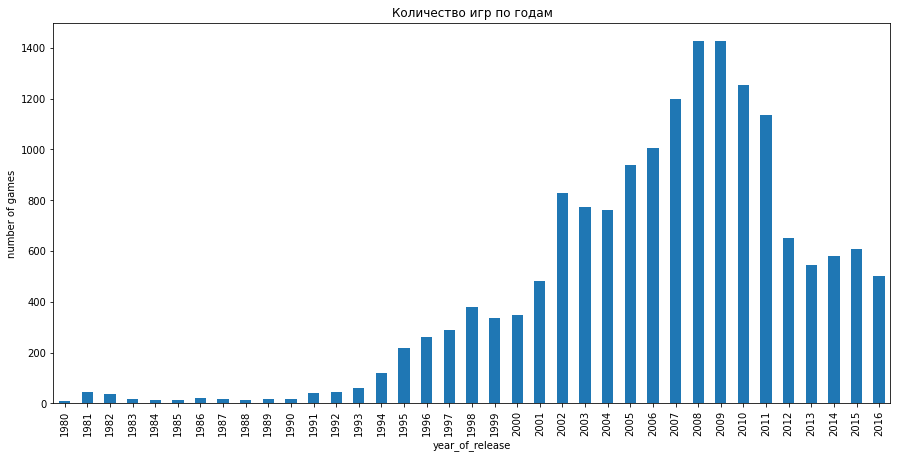

In [23]:
#Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
df.groupby('year_of_release')['year_of_release'].count().plot(kind='bar', figsize=(15,7))
plt.title('Количество игр по годам')
plt.ylabel('number of games')
plt.show()

**Вывод**
<br>
Как мне кажется, нет смысла рассматривать все периоды. С 2002 года по 2011 был подъем в игровой индустрии, а далее все пошло на спад. Пиком можно считать 2008-2009 годы, когда было выпущено больше всего игр. В последние годы идет тренд на снижение. С 2012 года по 2016 год примерно выпуск игр был одинаковым, соответсвенно, можно предположить,что тенденция может сохраниться.

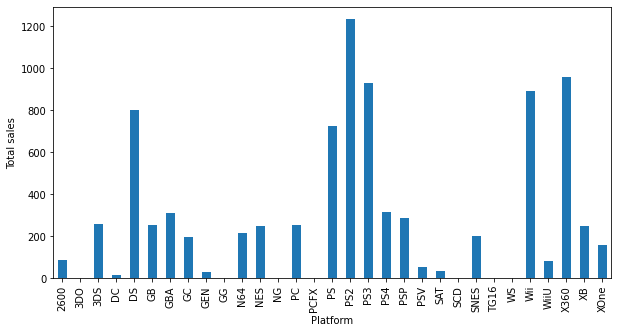

In [24]:
#Посмотрим самые продаваемые игровые платформы
platforms_sales = df.pivot_table(index='platform', values='total_sales', aggfunc='sum')
platforms_sales.plot(kind='bar', y='total_sales', figsize=(10, 5), legend=False).set(xlabel='Platform', ylabel='Total sales')
plt.show()

In [25]:
#Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. 
top_platforms = df.groupby(['platform'])['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False).head(5)
top_platforms

,platform,total_sales
16,PS2,"1,233.56"
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78


In [26]:
# построим линейный график сумм продаж по этим 5 платформам
platforms_sales = df.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
platforms_sales.fillna(0, inplace=True) 
display(platforms_sales)

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
2600,11.38,35.68,28.88,5.84,0.27,0.45,0.67,1.94,0.74,0.63,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3DO,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3DS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,63.20,51.36,56.57,43.76,27.78,15.14
DC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.02,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
DS,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,...,146.94,145.31,119.54,85.02,26.18,11.01,1.54,0.00,0.00,0.00
GB,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.43,64.97,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GBA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GEN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


**Вывод**
<br>
Наши лидеры продаж за все время:
<br>
PS2, X360, PS3, Wii, DS
<br>

Теперь посмотрим топ-5 самых продаваемых игровых платформ

In [27]:
#Посмотрим распределение продаж с 1994 года
platform_sales_since_94 = df.query('year_of_release >= 1994').groupby(['platform', 'year_of_release']).agg({'total_sales': 'sum'}).reset_index()

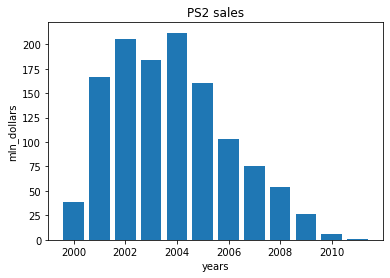

In [28]:
#PS2
ps2 = platform_sales_since_94[platform_sales_since_94['platform'] == 'PS2']
plt.bar(ps2['year_of_release'], ps2['total_sales'])
plt.xlabel('years')
plt.ylabel('mln_dollars')
plt.title('PS2 sales')
plt.show()

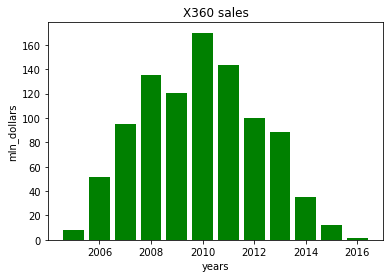

In [29]:
#x360
x360 = platform_sales_since_94[platform_sales_since_94['platform'] == 'X360']
plt.bar(x360['year_of_release'], x360['total_sales'], color='green')
plt.xlabel('years')
plt.ylabel('mln_dollars')
plt.title('X360 sales')
plt.show()

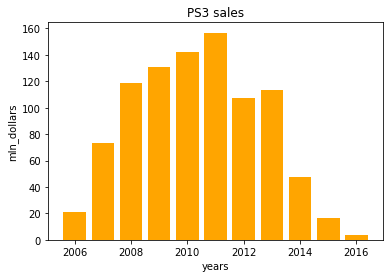

In [30]:
#PS3
ps3 = platform_sales_since_94[platform_sales_since_94['platform'] == 'PS3']
plt.bar(ps3['year_of_release'], ps3['total_sales'], color='orange')
plt.xlabel('years')
plt.ylabel('mln_dollars')
plt.title('PS3 sales')
plt.show()

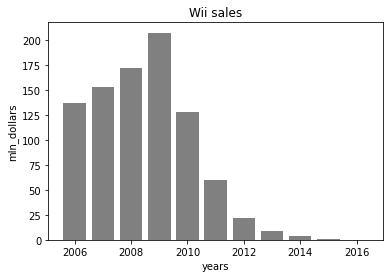

In [31]:
#Wii
wii = platform_sales_since_94[platform_sales_since_94['platform'] == 'Wii']
plt.bar(wii['year_of_release'], wii['total_sales'], color='grey')
plt.xlabel('years')
plt.ylabel('mln_dollars')
plt.title('Wii sales')
plt.show()

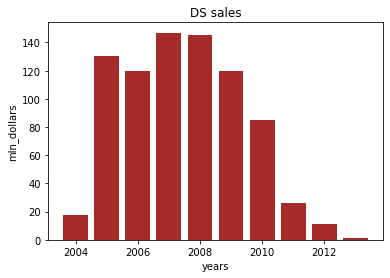

In [32]:
#DS
ds = platform_sales_since_94[platform_sales_since_94['platform'] == 'DS']
plt.bar(ds['year_of_release'], ds['total_sales'], color='brown')
plt.xlabel('years')
plt.ylabel('mln_dollars')
plt.title('DS sales')
plt.show()

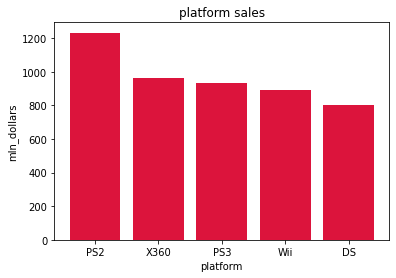

In [33]:
# построим график общих продаж по платформам из выбранных топ 5 после 94 г
plt.bar(top_platforms['platform'], top_platforms['total_sales'], color='crimson')
plt.xlabel('platform')
plt.ylabel('mln_dollars')
plt.title('platform sales')
plt.show()

**Вывод**
<br>
Как видим на графиках, был некий подъем и далее спад. Рассмотрим каждую консоль отдельно, кроме PS2 и PS3, так как это консоли одной компании.
<br>
Дата выхода PS2 4 марта 2000 год и она считается самой успешной консолью. Как раз на графике видно подъем продаж после 2000 года. Спад начинается в 2006 года, но был выпуск PS3, который состоялся в Японии 11 ноября 2006 года, 17 ноября приставка появилась в Северной Америке в первом квартале 2007 года. И подъем сохранялся до 2012 года, далее с 2012 уже начался спад, что обосновано анонсом 4ой консоли данной серии, которая вышла в 2013 году.
<br>
Xbox 360 это вторая по счёту игровая приставка компании Microsoft. Конкурентами Xbox 360 среди игровых платформ седьмого поколения являлись PlayStation 3 от Sony и Wii от Nintendo. 
Xbox 360 был официально анонсирован 12 мая 2005 года. Все доступные на время выпуска приставки были успешно проданы в каждой стране, кроме Японии.
<br>
Wii — игровая приставка 7-го поколения. Была выпущена в продажу в 2006 году. Как игровая система 7-го поколения, является прямым конкурентом Microsoft Xbox 360 и Sony PlayStation 3. Пик продаж был в 2009 году.Далее начался спад. Официально она стоила ~250 долларов. В 2009 году стала снимажться цена. Сначала 200, далее 150 долларов в мае 2009. Как мы и видим подъем продаж начался именно в 2009 году. В том же году была анонсирована консоль следующего поколения и начался спад на продажи.
<br>
Nintendo DS это портативная консоль, которая была выпущена в 2004 году. В 2008 была выпущена новая версия, соответсвенно с 2008 начинается небольшой спад продаж.
<br>
Срок "жизни" консоли примерно 10 лет. Из них пик продаж от 4 до 6 лет, далее происходит спад. Как было написано, спад происходил из-за насыщения рынка, а так е выпуска новой консоли. 


Соответсвенно можно сделать такой вывод, что в год объявления выпуска консолей не было такого подъема продаж. Подъем часто нарастает постепенно (кроме PS2 - самая популярная консоль). На подъем влияли прайсдропы и возможно выпуски популярных качественных игр, но это можно еще уточнить. 
Снижение происходило после прайсдропов, так как рынок был насещён или же были уже анонсированы новые консоли.
Playstation выпускает новую консоль каждые 7 лет, Xbox - выпуск консолей был в 2001, 2005, 2013, 2016.
Wii - 2006, 2011. Wii U (вторая версия консоли была провальной, что мы и видим на графике). После была выпущена модель Nintendo Switch в 2016 году.
DS - 2004, 2006, 2008, 2010. В 2011 году Nintendo выпустила консоль Nintendo 3DS, которая не оправдала надежд и имела технические проблемы. В 2012 году обновили консоль Nintendo 3DS XL, в 2013 была выпущена модель Nintendo 2DS, в 2014-2015 выпущены «New 3DS» и «New 3DS XL». Эти модели не в списке. 

**Чтобы проверить актуальные данные, рассмотрим последние 4 года, так как в последние 4 года продажи находятся примерно на одном уровне.**

In [34]:
#Посмотрим актуальное распределение продаж с 2012 года
platform_sales_since_2012 = df.query('year_of_release >= 2012').groupby(['platform', 'year_of_release']).agg({'total_sales': 'sum'}).reset_index()

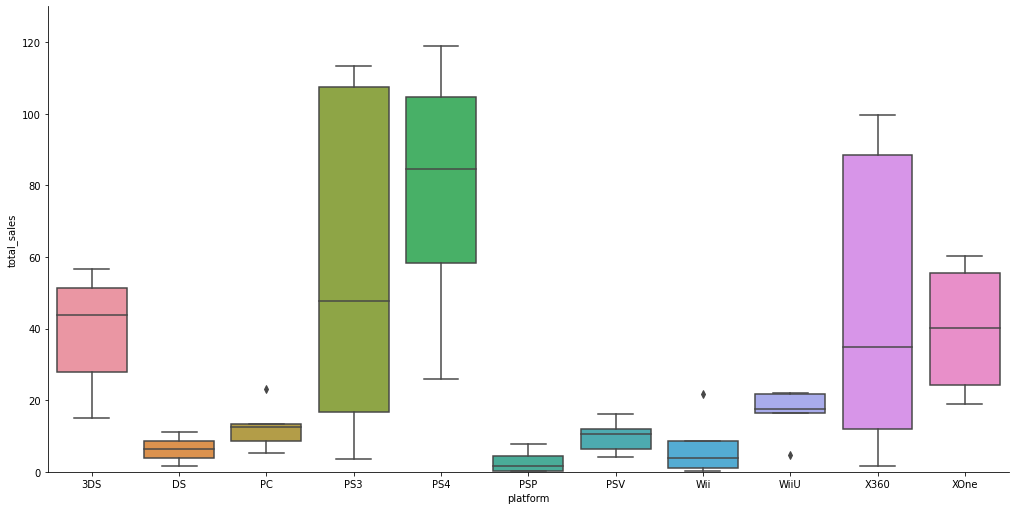

In [35]:
# смотрим глобальные продажи всех игр по платформам, актуальных с 2000 года по 2016 год
sns.catplot(x="platform", 
            y='total_sales', 
            kind="box", 
            data=platform_sales_since_2012, 
            orient='v', 
            height=7, 
            aspect=2,
            #palette='flare'
           )
_ = plt.ylim(0, 130)

In [36]:
#Посмотрим распределение продаж с 1994 года
platform_sales_since_94 = df.query('year_of_release >= 1994').groupby(['platform', 'year_of_release']).agg({'total_sales': 'sum'}).reset_index()

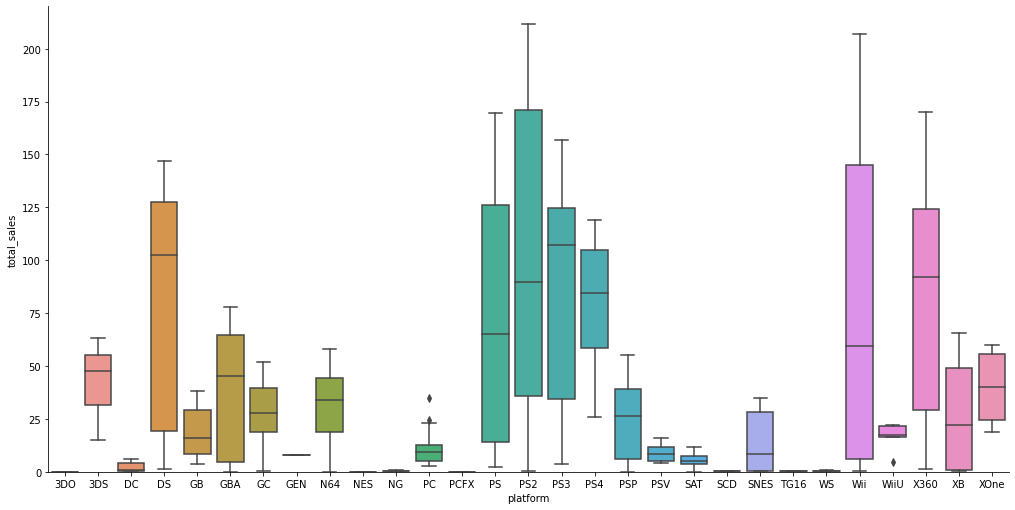

In [37]:
sns.catplot(x="platform", 
            y='total_sales', 
            kind="box", 
            data=platform_sales_since_94, 
            orient='v', 
            height=7, 
            aspect=2,
            #palette='flare'
           )
_ = plt.ylim(0, 220)

**Вывод**
Лидеры немного поменялись. Playstation 4 и Playstation 3 можно считать абсолютными лидерами, на третьем месте находится  X360. На четвертом месте XOne и последнее место в топ 5 занимает 3DS.

**Вывод 2**
WII мог бы составить конкуренцию популярным консолям (как и PS), но, к сожалению, сдал позиции после 2011 года

In [38]:
#Актуальные платформы с 2012 года по 2016 год
platforms_since_2012 = df.query('year_of_release >= 2012')

In [39]:
top__since_2012 = platforms_since_2012.groupby('platform')['total_sales'].sum().sort_values(ascending=False).index[0:5]
top__since_2012

Index(['PS4', 'PS3', 'X360', '3DS', 'XOne'], dtype='object', name='platform')

Как видим, в отрезке последних 4 лет лидеры поменялись - 'PS4', 'PS3', 'X360', '3DS', 'XOne'

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Возьмем самую популярную консоль актуального отрезка времени - PS4

In [40]:
#Выделяем данные по приставке без пропусков(числовое значение -1)
ps4 = platforms_since_2012.query('platform == "PS4" and (user_score != -1) and (critic_score != -1)')

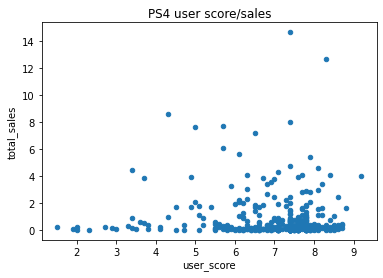

In [41]:
# строим диаграмму рассеяния для отзывов игроков
ps4.plot(x='user_score', y='total_sales', kind='scatter', title='PS4 user score/sales')
plt.show()

In [42]:
#Корреляция между отзывами и продажами
ps4['user_score'].corr(ps4['total_sales'])

-0.0654819507758568

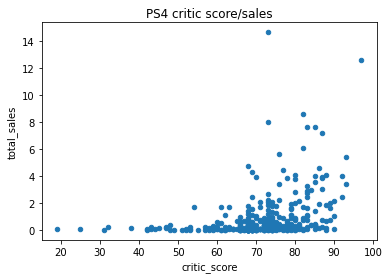

In [43]:
# строим диаграмму рассеяния для отзывов критиков
ps4.plot(x='critic_score', y='total_sales', kind='scatter', title = 'PS4 critic score/sales')
plt.show()

In [44]:
#Корреляция между отзывами и продажами
ps4['critic_score'].corr(ps4['total_sales'])

0.35140802447758474

**Вывод**
<br>
Графики показывают, что отзывы игроков никак не влияют на продажи, так как коэффициент корреляции составил -0.06, а отзывы критиков все же имеют значение, имея коэффициент корреляции 0,35.

Можем посмотреть те же параметры у других консолей. PS3 и X360, так как они в лидерах по продажам

In [45]:
#Проделываем те же манипуляции с PS3
ps3 = platforms_since_2012.query('platform == "PS3" and (user_score != -1) and (critic_score != -1)')

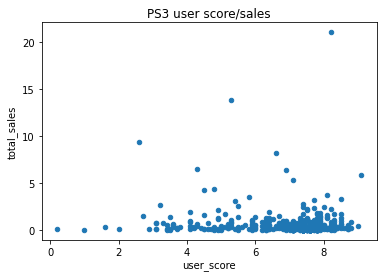

In [46]:
ps3.plot(x='user_score', y='total_sales', kind='scatter', title='PS3 user score/sales')
plt.show()

In [47]:
ps3['user_score'].corr(ps3['total_sales'])

-0.08737842929064489

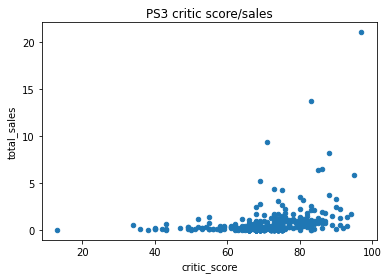

In [48]:
ps3.plot(x='critic_score', y='total_sales', kind='scatter', title = 'PS3 critic score/sales')
plt.show()

In [49]:
ps3['critic_score'].corr(ps3['total_sales'])

0.32333130141655564

In [50]:
#Проделываем те же манипуляции с X360
x360 = platforms_since_2012.query('platform == "X360" and (user_score != -1) and (critic_score != -1)')

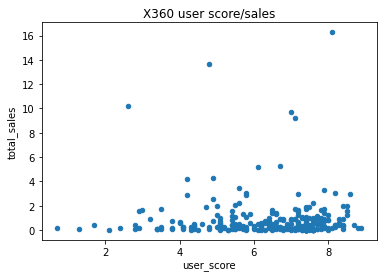

In [51]:
x360.plot(x='user_score', y='total_sales', kind='scatter', title='X360 user score/sales')
plt.show()

In [52]:
x360['user_score'].corr(x360['total_sales'])

-0.03413344563451158

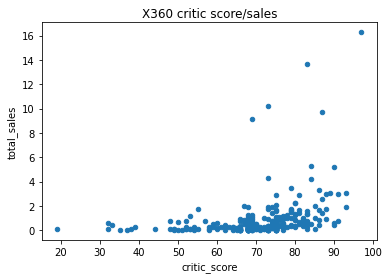

In [53]:
x360.plot(x='critic_score', y='total_sales', kind='scatter', title = 'X360 critic score/sales')
plt.show()

In [54]:
x360['critic_score'].corr(x360['total_sales'])

0.3339369217323399

**Вывод**
<br>
Все актуально для других приставок. Оценки игроков не имеют влияния, а оценки критиков частично влияют на продажи, где-то больше, где-то меньше.


Посмотрим общее распределение игр по жанрам. Самые прибыльные жанры. Жанры с высокими и низкими продажами

In [55]:
#Популярные жанры за актуальный период с 2012
top_genre = platforms_since_2012.groupby('genre')['total_sales'].sum().sort_values(ascending=False).index[0:5]
top_genre

Index(['Action', 'Shooter', 'Role-Playing', 'Sports', 'Misc'], dtype='object', name='genre')

In [56]:
#Можно проверить все игры с 1980 года
platforms_since_1980 = df.query('year_of_release >= 1980')
top_genre1 = platforms_since_1980.groupby('genre')['total_sales'].sum().sort_values(ascending=False).index[0:5]
top_genre1

Index(['Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform'], dtype='object', name='genre')

**Вывод**
<br>
Наш топ актуальных жанров:
<br>
Action - Имеет акцент на борьбе, включает в себя прохождение определённых уровней для достижения битвы с боссами.
<br>
Shooter - Игрок находится в трёхмерном пространстве и имеет некоторую свободу передвижения. Уровни, как правило, являют собой ограниченный лабиринт, в котором расположены враги, союзники и нейтрально настроенные NPC, которых необходимо уничтожить
<br>
RPG - Сосредоточена на решении проблем, взаимодействии с неигровыми персонажами, участии в боях, статистическом развитии персонажа
<br>
Misc - или miscellaneous. Игры, не принадлежащие к одному определенному жанру
<br>
Sports - Отражают соревнования по существующим видам спорта
_________________
Жанры популярные за все время:
<br>
Различий немного. В топе остались action, sport, shooter,RPG, а так же был популярен platform, который был вытеснен жанром misc
<br>
Platform - Основное внимание уделяется прыжкам или сложностям навигации, часто включают в себя элементы игр-экшенов

In [57]:
games_sales = df.pivot_table('total_sales', 
                                             index='name', 
                                             columns='platform', aggfunc='median')
games_sales.fillna(0, inplace=True)
games_sales['all_platforms'] = games_sales.sum(axis=1)
games_sales = games_sales.sort_values(by='all_platforms', ascending=False)
games_sales = games_sales.reset_index()

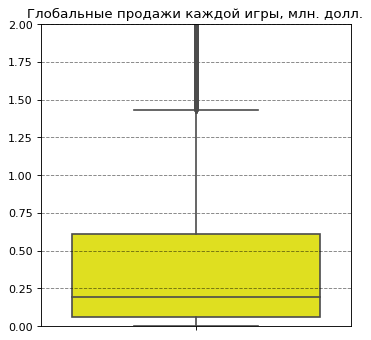

In [58]:
plt.figure(figsize=(5, 5), dpi= 80)
plt.ylim(0,2)
plt.title('Глобальные продажи каждой игры, млн. долл.')

plt.grid(linestyle='--', which='major',
         color='black', alpha=.5)
sns.boxplot(y=games_sales['all_platforms'], color="yellow")
plt.ylabel('')
plt.show()

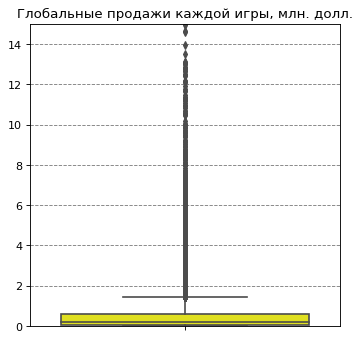

In [59]:
plt.figure(figsize=(5, 5), dpi= 80)
plt.ylim(0,15)
plt.title('Глобальные продажи каждой игры, млн. долл.')

plt.grid(linestyle='--', which='major',
         color='black', alpha=.5)
sns.boxplot(y=games_sales['all_platforms'], color="yellow")
plt.ylabel('')
plt.show()

**Вывод**
В среднем мы видим, что медианные продажи игр были в районе 0,6 млн.долларов. Тем не менее есть продажи игр и превышающие 15 млн.

In [60]:
games_amount = df.groupby(['genre']).agg({'name':['count']})
games_amount

,name
,count
genre,
Action,3307
Adventure,1293
Fighting,837
Misc,1721
Platform,878
Puzzle,569
Racing,1226
Role-Playing,1481


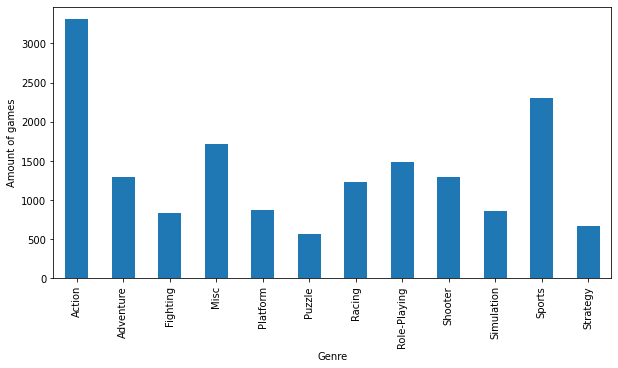

In [61]:
games_amount.plot(kind='bar', y='name', figsize=(10, 5), legend=False).set(xlabel='Genre', ylabel='Amount of games')
plt.show()

In [62]:
#Посмотрим количество за актуальный период - последние 4 года
games_amount_actual = platforms_since_2012.groupby(['genre']).agg({'name':['count']})
games_amount_actual

,name
,count
genre,
Action,1031
Adventure,302
Fighting,109
Misc,192
Platform,85
Puzzle,28
Racing,115
Role-Playing,370


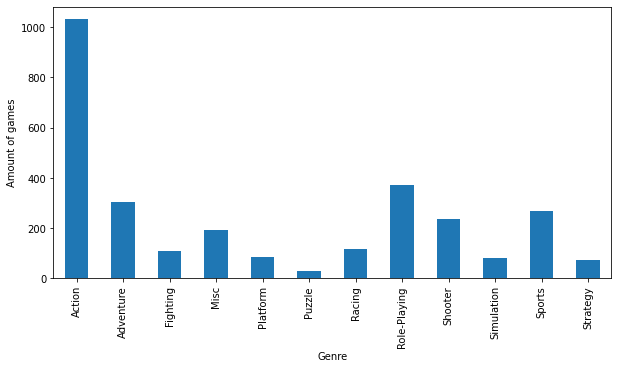

In [63]:
games_amount_actual.plot(kind='bar', y='name', figsize=(10, 5), legend=False).set(xlabel='Genre', ylabel='Amount of games')
plt.show()

**Вывод**
<br>
Если смотреть за весь период, то экшен-игры всегда лидировали вреди остальных жанров. Что касается других жанров, то все же было больше разнообразия. Больше покупали спортивные игры, RPG, гонки или же misc игры.
<br>
В настоящее время action по прежнему лидирует по количеству игр и очень сильно отстают другие жанры. Мы можем видеть наглядно лидера и отстающих. Топ не популярных жанров с низкими продажами: Puzzle, Strategy, Simulation, Platform, Fighting

## 4. Составьте портрет пользователя каждого региона

In [64]:
#топ консолей в Северной Америке
top_platforms_na = df.query('year_of_release >= 2012').pivot_table(index='platform', values='na_sales', aggfunc='sum').nlargest(5, 'na_sales')
top_platforms_na

,na_sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31


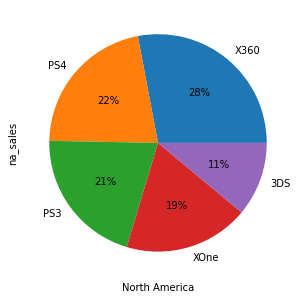

In [65]:
top_platforms_na.plot(kind='pie', y='na_sales', x='platform', autopct='%1.0f%%', figsize=(10, 5), legend=False).set(xlabel='North America')
plt.show()

In [66]:
#топ консолей в Европе
top_platforms_eu = df.query('year_of_release >= 2012').pivot_table(index='platform', values='eu_sales', aggfunc='sum').nlargest(5, 'eu_sales')
top_platforms_eu

,eu_sales
platform,
PS4,141.09
PS3,106.86
X360,74.52
XOne,51.59
3DS,42.64


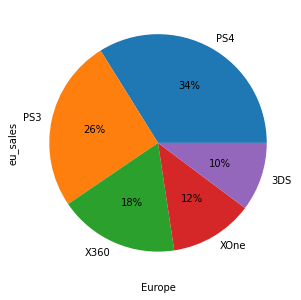

In [67]:
top_platforms_eu.plot(kind='pie', y='eu_sales', x='platform', autopct='%1.0f%%', figsize=(10, 5), legend=False).set(xlabel='Europe')
plt.show()

In [68]:
#топ консолей в Японии 
top_platforms_jp = df.query('year_of_release >= 2012').pivot_table(index='platform', values='jp_sales', aggfunc='sum').nlargest(5, 'jp_sales')
top_platforms_jp

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01


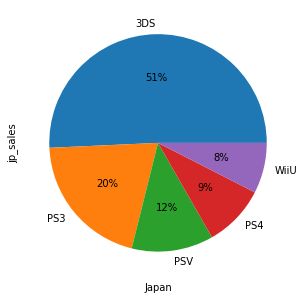

In [69]:
top_platforms_jp.plot(kind='pie', y='jp_sales', x='platform', autopct='%1.0f%%', figsize=(10, 5), legend=False).set(xlabel='Japan')
plt.show()

**Вывод**
<br>
Топ консолей отличается. Если в Северной Америке на первом месте американский X360 от Майкрософт, а второе и третье место с небольшим отрывом делят PS4 и PS3
<br>
В Европе самые популярные консоли PS4 и PS3, а с большим отрывом на третьем месте X360.
<br>
Япония сильно отличается от Северной Америки и Европы по предпочтениям. Несмотря на то,что Sony Playstation так же является японским детищем, японцы все же предпочитают Nintendo 3DS. На втором месте PS3, на третьем PSV, а новая платформа PS4 (на тот момент) находится всего лишь на 4 месте с большим отрывом от лидера.

### Самые популярные жанры (топ-5). 

In [70]:
#Топ жанры в Северной Америке
top_genres_na = df.query('year_of_release >= 2012').pivot_table(index='genre', values='na_sales', aggfunc='sum').nlargest(5, 'na_sales')
top_genres_na

,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19


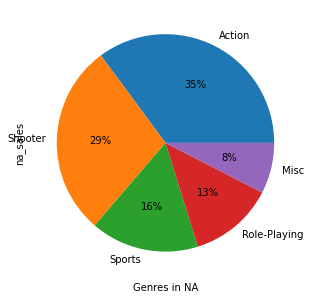

In [71]:
top_genres_na.plot(kind='pie', y='na_sales', x='platform', autopct='%1.0f%%', figsize=(10, 5), legend=False).set(xlabel='Genres in NA')
plt.show()

In [72]:
#Топ жанры в Европе
top_genres_eu = df.query('year_of_release >= 2012').pivot_table(index='genre', values='eu_sales', aggfunc='sum').nlargest(5, 'eu_sales')
top_genres_eu

,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29


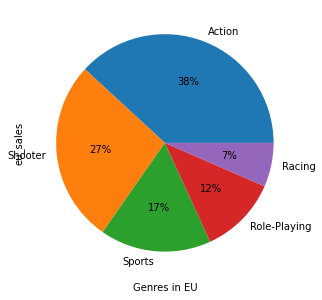

In [73]:
top_genres_eu.plot(kind='pie', y='eu_sales', x='platform', autopct='%1.0f%%', figsize=(10, 5), legend=False).set(xlabel='Genres in EU')
plt.show()

In [74]:
#Топ жанры в Японии
top_genres_jp = df.query('year_of_release >= 2012').pivot_table(index='genre', values='jp_sales', aggfunc='sum').nlargest(5, 'jp_sales')
top_genres_jp

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44


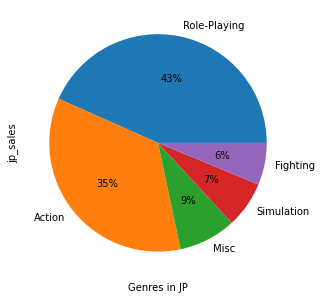

In [75]:
top_genres_jp.plot(kind='pie', y='jp_sales', x='platform', autopct='%1.0f%%', figsize=(10, 5), legend=False).set(xlabel='Genres in JP')
plt.show()

**Вывод**
<br>
Четыре первых места делят Action, Shooter, Sports, Role-Playing. Этот список одинаковый в Северной Америке и Европе. Пятое место в Америке - многожанровые игры misc, в Европе предпочитают гонки.
<br>
Япония отличается и в предпочтениях по жанрам. Их предпочтения: Role-Playing, Action, Misc, Simulation, Fighting
<br>

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [76]:
#Распределение игр по рейтингу ESRB в США
rating_esrb_na = df.loc[df['rating']!= -1].query('year_of_release >= 2012').pivot_table(index='rating', values='na_sales', aggfunc='sum')
rating_esrb_na

,na_sales
rating,
E,114.37
E10+,75.70
M,231.57
T,66.02
unknown,103.31


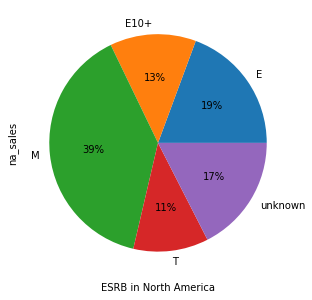

In [77]:
rating_esrb_na.plot(kind='pie', y='na_sales', x='rating', autopct='%1.0f%%', figsize=(10, 5), legend=False).set(xlabel='ESRB in North America')
plt.show()

In [78]:
#Распределение игр по рейтингу ESRB в Европе
rating_esrb_eu = df.loc[df['rating'] != -1].query('year_of_release >= 2012').pivot_table(index='rating', values='eu_sales', aggfunc='sum')
rating_esrb_eu

,eu_sales
rating,
E,113.03
E10+,55.37
M,193.96
T,52.96
unknown,91.50


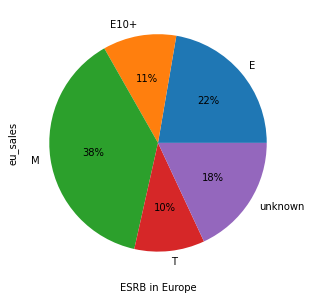

In [79]:
rating_esrb_eu.plot(kind='pie', y='eu_sales', x='rating', autopct='%1.0f%%', figsize=(10, 5), legend=False).set(xlabel='ESRB in Europe')
plt.show()

In [80]:
#Распределение игр по рейтингу ESRB в Японии
rating_esrb_jp = df.loc[df['rating'] != -1].query('year_of_release >= 2012').pivot_table(index='rating', values='jp_sales', aggfunc='sum')
rating_esrb_jp

,jp_sales
rating,
E,28.33
E10+,8.19
M,21.20
T,26.02
unknown,108.84


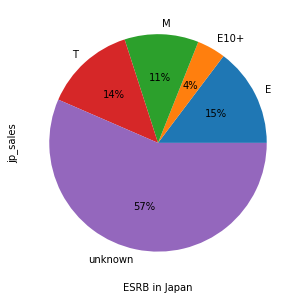

In [81]:
rating_esrb_jp.plot(kind='pie', y='jp_sales', x='rating', autopct='%1.0f%%', figsize=(10, 5), legend=False).set(xlabel='ESRB in Japan')
plt.show()

*Расшифровка рейтинга ESRB*
<br>
"E" ("Everyone") — "Для всех": Содержание подходит для детей от 6 лет. Такие игры могут понравиться и взрослым. Содержат минимальное насилие, в основном игры «мультяшного» характера.
<br>
"E10+" - "Everyone 10 and older" — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови.
<br>
"T" ("Teen") — "Подросткам": Игра подходит для лиц от 13 лет. Такие игры могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.
<br>
"M"("Mature") — "Для взрослых": Игры не подходят для подростков младше 17 лет. Игры с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.

**Вывод**
<br>
Портрет пользователя в Северной Америке:
в Северной Америке на первом месте американский X360 от Майкрософт, а второе и третье место с небольшим отрывом делят PS4 и PS3
<br>
Портрет пользователя в Европе:
В Европе самые популярные консоли PS4 и PS3, а с большим отрывом на третьем месте X360.
<br>
Топ популярных жанров: Четыре первых места делят Action, Shooter, Sports, Role-Playing. Этот список одинаковый в Северной Америке и Европе. Пятое место в Америке - многожанровые игры misc, в Европе предпочитают гонки.
Практически одинаковое количество всех игр в Северной Америке и Европе выпускается для взрослых, что составляет 38-39%. Также выпускается довольно много игр для детей с рейтингом Е 19-22%, С рейтингом Е10+ также примерно одинаковое количество - 11-13% и 10-11% от всех игр выпускается для подростков. 17-18% игр в данных без рейтинга.
<br>
Портет пользователя в Японии: Японцы предпочитают Nintendo 3DS. На втором месте PS3, на третьем PSV, а новая платформа PS4 (на тот момент) находится всего лишь на 4 месте с большим отрывом от лидера. Япония опять отличается от всего мира. В Японии 15% игр для всех, 14% для подростков, 11% для взрослых и 4% для детей старше 10. 57% данных по рейтингам, увы, недоступно. Япония отличается и в предпочтениях по жанрам. Их предпочтения: Role-Playing, Action, Misc, Simulation, Fighting
<br>
В принципе соотношение любимых жанров и рейтинга ESRB вполне объясним. Как мы видим, на первых местах популярные жанры в США и Европе - Action и Shooter, что явно не подходит для детей с рейтингом Е и Е10+. В Японии популярные жанры Role-Playing, Simulation, Misc,что вролне подходит для детей и подростков.
<br>

## 6. Проверка гипотез

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Проверим первую гипотезу:
H0 — средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
H1 — средние пользовательские рейтинги платформ Xbox One и PC отличаются.
<br>
Пороговое значение alpha  0.05
В данном анализе будем применим t-тест Стьюдента. Я сформировала гипотезу Н0 и альтернативную гипотезу Н1. Далее проводится анализ. Гипотеза отвергается, либо принимается.

In [82]:
#Давайте сравним актуальные данные, которые могут повлиять на следующий год
data_since_2012 = platforms_since_2012.query('(user_score != -1) and (critic_score != -1)')

In [83]:
xbox_one = data_since_2012[data_since_2012['platform'] == 'XOne']['user_score']
pc = data_since_2012[data_since_2012['platform'] == 'PC']['user_score']

alpha = 0.05

results =  st.ttest_ind(
    xbox_one, 
    pc)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2524258657195588
Не получилось отвергнуть нулевую гипотезу


**Вывод**
<br>
Можно сделать вывод, что средние рейтинги платформ Xbox и PC не сильно отличаются. Соответсвенно, у нас не получилось отвергнуть нулевую гипотезу

**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные**

Проверим вторую гипотезу:
H0 — средние пользовательские рейтинги жанров Action и Sports одинаковые.
H1 — средние пользовательские рейтинги жанров Action и Sports разные.

In [84]:
action = data_since_2012[data_since_2012['genre'] == 'Action']['user_score']   
sport = data_since_2012[data_since_2012['genre'] == 'Sports']['user_score']

alpha = 0.05

results =  st.ttest_ind(
    action, 
    sport)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 6.70766861002191e-40
Отвергаем нулевую гипотезу


**Вывод**
<br>
Судя по цифрам, мы отвергаем нулевую гипотезу и рейтинги жанров action и sports отличаются. Как мы видели ранее, рейтинги жанра action выше.

## 6. Общий вывод

Была выполнена предобработка данных, заменены пропуски, переименованы столбцы и изменены типы данных. Пропуски были заменены. Дубликаты не найдены.
Удалены строки с пропусками в названиях, так как такие строки не несут для нас нужной информации. Произведена частичная замена пропусков года релиза в тех случаях, когда игра была выпущена на других платформах.
В столбце user score найдено значение tbd, что означает to be determined. Рейтинг еще не установлен, соответственно, значение было заменено на -1, но в дальнейшем было учтено при анализе данных. Создан столбец с общей суммой продаж.
При анализе данных был выявлен актуальный период времени, который стоит учитывать в планировании следующего отчетного года.
С 2002 года по 2011 был подъем в игровой индустрии, а далее все пошло на спад. Пиком можно считать 2008-2009 годы, когда было выпущено больше всего игр. В последние годы идет тренд на снижение. С 2012 года по 2016 год примерно выпуск игр был одинаковым, соответсвенно, можно предположить,что тенденция может сохраниться. Именно период с 2012 по 2016 будем считать актуальным периодом.

**Рекомендации**
<br>
-При планировании кампании на 2017 год стоит учитывать актуальные данные с 2012 года по 2016 год.
<br>
-Не стоит ориентироваться при продаже игр на пользовательские оценки, так как они не особо влияют на продажу игр, оценки критиков стоит принимать во внимание, хотя они тоже не играют ключевую роль.
<br>
-Стоит учитывать выпуск новых консолей, устаревание предыдущих моделей,  соответственно будет спад на покупку новой игры. Диверсифицировать продажи игр по платформам. Но очень важно учитывать особенности предпочтений пользователей из различных регионов, т.к. они достаточно сильно различаются.  В Северной Америке на первом месте американский X360 от Майкрософт, а второе и третье место с небольшим отрывом делят PS4 и PS3
В Европе самые популярные консоли PS4 и PS3, а с большим отрывом на третьем месте X360.
Япония сильно отличается от Северной Америки и Европы предпочитает Nintendo 3DS. На втором месте PS3, на третьем PSV, а новая платформа PS4 (на тот момент) находится всего лишь на 4 месте с большим отрывом от лидера.
<br>
-Продажа игр регионам должна осуществляться следующим образом: В Америке и Европе предпочитают Action и Shooter. Такие жанры более характерны для рейтинга M (для взрослых). А в Японии стоит сделать упор на  Role-Playing в первую очередь а потом уже Action, Misc и Simulation. Больше всего популярны игры для детей с рейтингом Е и T для подростков. В Америке и Европе рекомендуется осуществлять также продажи игр с рейтингом E (для всех)

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  замените названия столбцов (приведите к нижнему регистру)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  опишите причины, которые могли привести к пропускам;
- [x]  обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
- [x]  посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.
- [x]  Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- [x]  Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- [x]  Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- [x]  Не учитывайте в работе данные за предыдущие годы.
- [x]  Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- [x]  Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- [x]  Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- [x]  Соотнесите выводы с продажами игр на других платформах.
- [x]  Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
- [x] Определите для пользователя каждого региона (NA, EU, JP): Самые популярные платформы (топ-5). Самые популярные жанры (топ-5). Влияет ли рейтинг ESRB на продажи в отдельном регионе?
- [x] Проверьте гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- [x] Написать общий вывод